<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/Lecture_4_Analyzing_Massive_Graphs_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 4: Analyzing Massive Graphs - Part I
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox - Lecture 2](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 
---


## 0. Package Setup
For this lecture, we are going to use the [Kaggle](https://github.com/Kaggle/kaggle-api), [TuriCreate](https://github.com/apple/turicreate), [Networkx](https://networkx.github.io), [igraph](https://igraph.org/python/) packages. Let's set them up:

In [0]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"<Insert Your Kaggle User Name>","key":"<Insert Your Kaggle API key>"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json


In [0]:
!pip install turicreate

     |████████████████████████████████| 91.4MB 49kB/s 
     |████████████████████████████████| 3.4MB 49.5MB/s 
     |████████████████████████████████| 421.8MB 30kB/s 
     |████████████████████████████████| 327kB 54.2MB/s 
     |████████████████████████████████| 3.9MB 50.1MB/s 
     |████████████████████████████████| 450kB 47.3MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=23714e7fa30e2a45e8480e1c193afe9929451387eaa28414c6423d1727621cfe
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built resampy
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow

In [0]:
!pip install networkx
!pip install python-igraph

     |████████████████████████████████| 3.2MB 3.5MB/s 


## Example 1:  Marvel Superheroes - Working with Networkx

In this example, we will learn how to work with graphs using the [Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network#edges.csv) dataset.
First, let's download the dataset, and use it to construct an undirected graph:

In [0]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/the-marvel-universe-social-network

# download the dataset from Kaggle and unzip it
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/the-marvel-universe-social-network
!unzip ./datasets/the-marvel-universe-social-network/*.zip  -d ./datasets/the-marvel-universe-social-network/

  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 89.6MB/s]
Archive:  ./datasets/the-marvel-universe-social-network/the-marvel-universe-social-network.zip
  inflating: ./datasets/the-marvel-universe-social-network/edges.csv  
  inflating: ./datasets/the-marvel-universe-social-network/hero-network.csv  
  inflating: ./datasets/the-marvel-universe-social-network/nodes.csv  


In [0]:
import networkx as nx
import turicreate as tc 

n_sf = tc.SFrame.read_csv("./datasets/the-marvel-universe-social-network/nodes.csv")
e_sf = tc.SFrame.read_csv("./datasets/the-marvel-universe-social-network/hero-network.csv")

n_sf

Finished parsing file /content/datasets/the-marvel-universe-social-network/nodes.csv

Parsing completed. Parsed 100 lines in 0.053736 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 12631 lines. Lines per second: 429509

Finished parsing file /content/datasets/the-marvel-universe-social-network/nodes.csv

Parsing completed. Parsed 19090 lines in 0.030409 secs.

Finished parsing file /content/datasets/the-marvel-universe-social-network/hero-network.csv

Parsing completed. Parsed 100 lines in 0.568765 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/the-marvel-universe-social-network/hero-network.csv

Parsing completed. Parsed 574467 lines in 0.456195 secs.

Columns:
	node	str
	type	str

Rows: 19090

Data:
+----------------------+-------+
|         node         |  type |
+----------------------+-------+
|       2001 10        | comic |
|        2001 8        | comic |
|        2001 9        | comic |
| 24-HOUR MAN/EMMANUEL |  hero |
| 3-D MAN/CHARLES CHAN |  hero |
|   4-D MAN/MERCURIO   |  hero |
|       8-BALL/        |  hero |
|        A '00         | comic |
|        A '01         | comic |
|        A 100         | comic |
+----------------------+-------+
[19090 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [0]:
e_sf

Columns:
	hero1	str
	hero2	str

Rows: 574467

Data:
+----------------------+----------------------+
|        hero1         |        hero2         |
+----------------------+----------------------+
|    LITTLE, ABNER     |    PRINCESS ZANDA    |
|    LITTLE, ABNER     | BLACK PANTHER/T'CHAL |
| BLACK PANTHER/T'CHAL |    PRINCESS ZANDA    |
|    LITTLE, ABNER     |    PRINCESS ZANDA    |
|    LITTLE, ABNER     | BLACK PANTHER/T'CHAL |
| BLACK PANTHER/T'CHAL |    PRINCESS ZANDA    |
| STEELE, SIMON/WOLFGA |   FORTUNE, DOMINIC   |
| STEELE, SIMON/WOLFGA | ERWIN, CLYTEMNESTRA  |
| STEELE, SIMON/WOLFGA | IRON MAN/TONY STARK  |
| STEELE, SIMON/WOLFGA | IRON MAN IV/JAMES R. |
+----------------------+----------------------+
[574467 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

Now let's load the nodes (vertices) and edges (links) data into a graph object. We can create the graph by inserting each node and each edge one after the other, or by inserting the nodes and edges all at once:

In [0]:
%%timeit
g = nx.Graph() # Creating Undirected Graph

# adding each node and edge one after the other
for n in n_sf['node']:
    g.add_node(n)
    
for r in e_sf:
    g.add_edge(r['hero1'], r['hero2'])

1 loop, best of 3: 2.23 s per loop


In [0]:
%%timeit
g = nx.Graph() # Creating Undirected Graph
# adding all nodes and vertices at once
g.add_nodes_from(n_sf['node'])
g.add_edges_from([(r['hero1'],r['hero2']) for r in e_sf])

1 loop, best of 3: 2.31 s per loop


In [0]:
g = nx.Graph() # Creating Undirected Graph
g.add_nodes_from(n_sf['node'])
g.add_edges_from([(r['hero1'],r['hero2']) for r in e_sf])
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 19232
Number of edges: 167219
Average degree:  17.3897


We can see that the constructed graph has over 19,000 nodes and over 167,000 edges. Let's use the graph structure to answer several questions.

**Question:** Who is the most friendly superhero?

**Note:** If we wanted to answer this question using DataFrame, it wouldn't be trivial because for each hero we would need to count the number of distinct friends both when the hero appears in the Hero1 column and the Hero2 column. However, answering this question using a graph object is relatively easy; we simply need to find the node with the maximal [degree](https://en.wikipedia.org/wiki/Degree_(graph_theory)).

Let's calculate the degree of each vertex:

In [0]:
d = g.degree()
list(dict(d).items())[:20]

[('2001 10', 0),
 ('2001 8', 0),
 ('2001 9', 0),
 ('24-HOUR MAN/EMMANUEL', 5),
 ('3-D MAN/CHARLES CHAN', 122),
 ('4-D MAN/MERCURIO', 72),
 ('8-BALL/', 14),
 ("A '00", 0),
 ("A '01", 0),
 ('A 100', 0),
 ('A 101', 0),
 ('A 102', 0),
 ('A 103', 0),
 ('A 104', 0),
 ('A 105', 0),
 ('A 106', 0),
 ('A 107', 0),
 ('A 108', 0),
 ('A 109', 0),
 ('A 10', 0)]

In [0]:
print("There are %s superheroes connected to Black Panter"  %
      d["BLACK PANTHER/T'CHAL"])

There are 711 superheroes connected to Black Panter


Let's find the vertex with the highest degree:

In [0]:
import operator
max(dict(d).items(), key=operator.itemgetter(1))

('CAPTAIN AMERICA', 1908)

So, using the _degree_, we discovered that the "most friendly" superhero is Captain America who is connected to 1908 heroes.
Let's use seaborn to calculate the graph degree distribution:

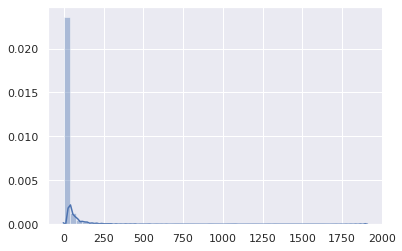

In [0]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.distplot([v for v in dict(d).values()])

From the above plot, we can see that many nodes have 0 or 1 degree, i.e. these heroes are not connected to any other
hero, or connected to only a single hero. Let's create a _subgraph_ without these nodes:

In [0]:
# let's create a list with nodes that have degree > 1
selected_nodes_list = [n for n,d in dict(d).items() if d > 1]
# create a subgraph with only nodes from the above list
h = g.subgraph(selected_nodes_list)
print(nx.info(h))

Name: 
Type: Graph
Number of nodes: 6373
Number of edges: 167167
Average degree:  52.4610


We were left with only 6373 heroes out of 19232 heroes. Among the wonderful things that are useful using graphs as data structures is the ability to separate them into communities, i.e., disjoint subgraphs. Let's use [Clauset-Newman-Moore greedy modularity maximization](https://arxiv.org/abs/cond-mat/0408187) to separate the graph into communities, and answer the following question:

**Question:** What is the largest community in the graph?

In [0]:
from networkx.algorithms.community import greedy_modularity_communities
cc = greedy_modularity_communities(h) # this can take some time
len(cc)


68

In [0]:
list(cc[0])[:20]

['AMERICAN EAGLE III/J',
 'KENT, CLARK',
 'NOMAD III/JACK MONRO',
 'KURRGO',
 'ZARIN',
 'MR. FANTASTIC DOPPEL',
 'PRINCESS PYTHON/ZELD',
 'BLACK KNIGHT V DOPPE',
 'INFERNO II/JOSEPH CO',
 'HULK DOPPELGANGER',
 'RAT',
 'MARVEL BOY III/ROBER',
 'SITWELL, JASPER',
 'GULADKIN',
 'LIVING MUMMY',
 'MORG',
 'JONES, RICHARD MILHO',
 'MELTON, LORRIE',
 'THOMAS, ROY',
 'OGRESS/']

Using the community detection algorithm, we detected 68 communities of different sizes. Let's view the size of the distribution of the community sizes:

(array([64.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([   3. ,  237.1,  471.2,  705.3,  939.4, 1173.5, 1407.6, 1641.7,
        1875.8, 2109.9, 2344. ]),
 <a list of 10 Patch objects>)

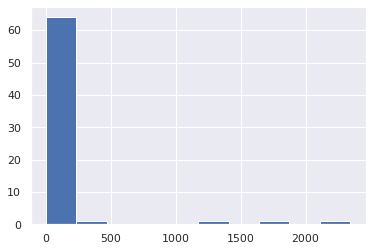

In [0]:
import matplotlib.pyplot as plt
community_size_list = [len(c) for c in cc]
plt.hist(community_size_list)

We can see that most communities are relatively small. Let's find a community that is larger than 100 but smaller than 500:

In [0]:
selected_community_list = [c for c in cc if 500 > len(c) > 100]
len(selected_community_list)

2

Let's draw both communities:

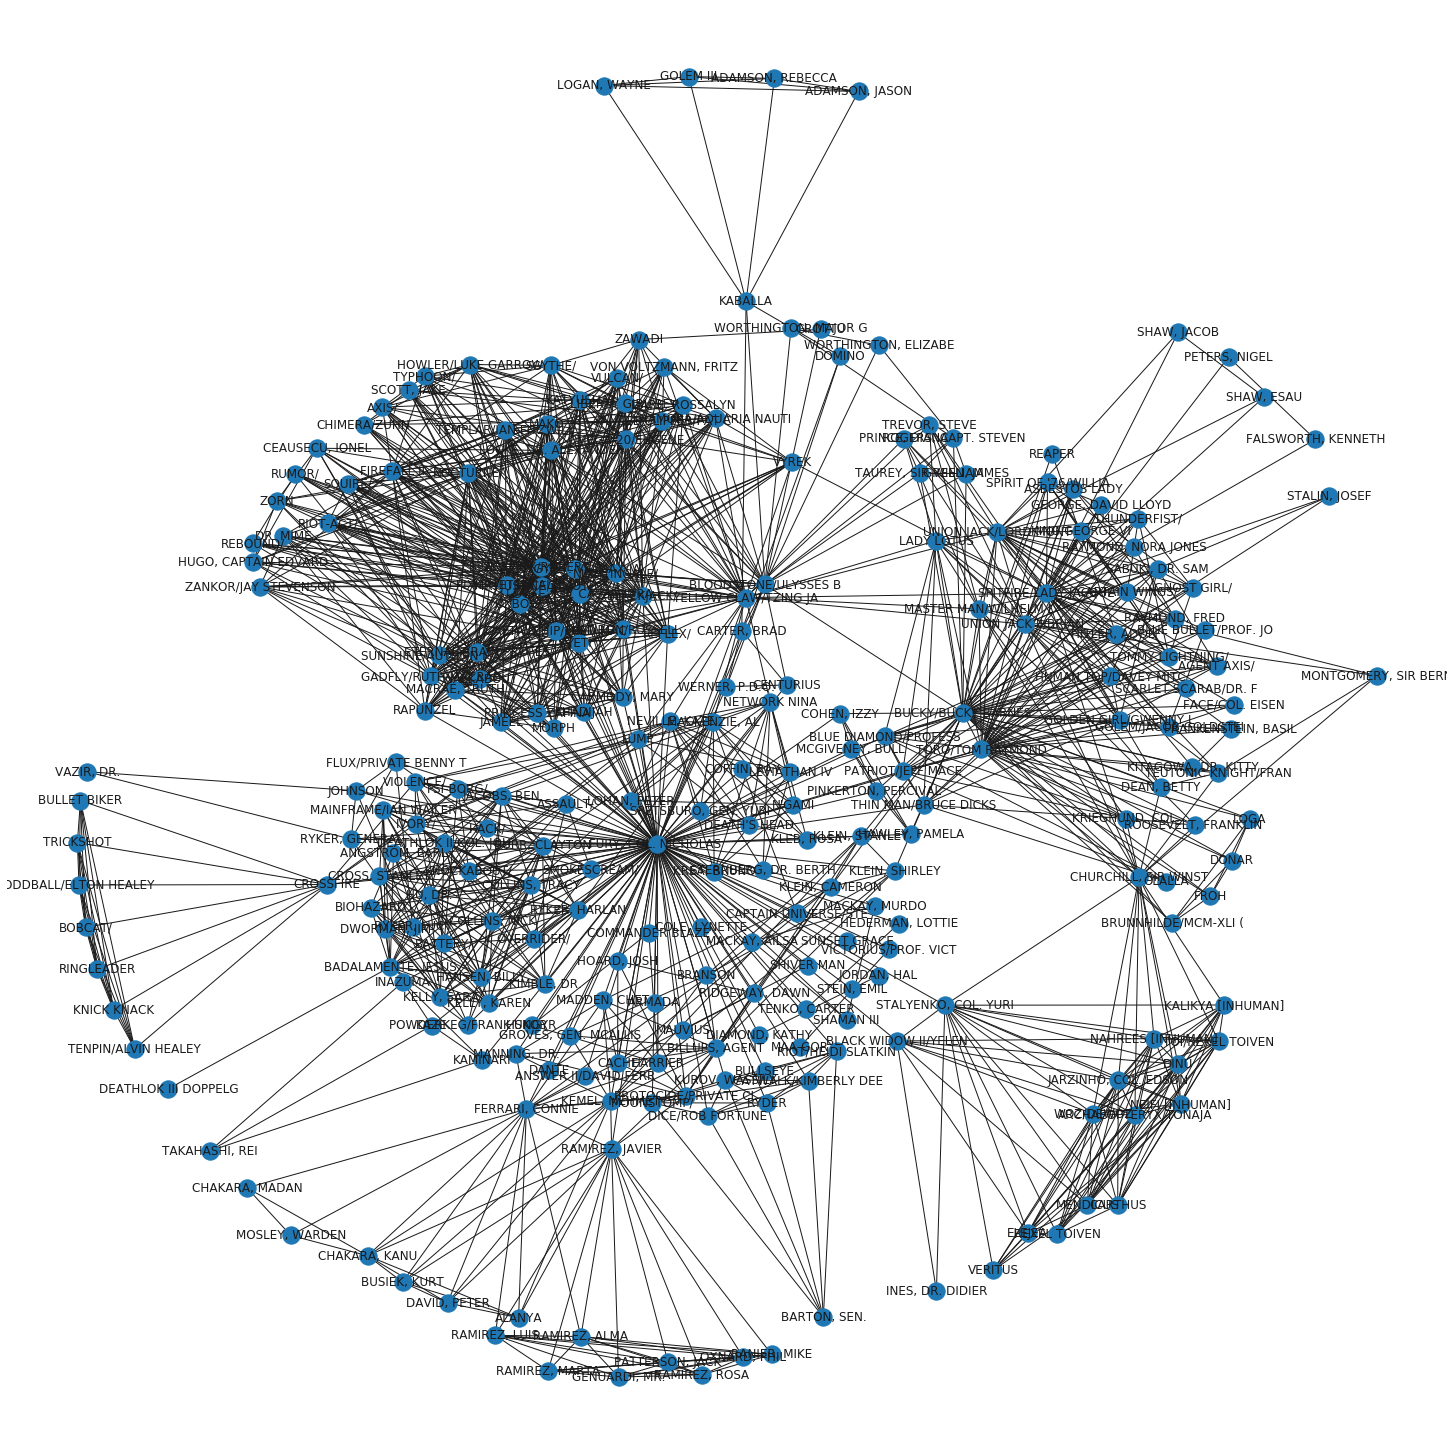

In [0]:
plt.figure(figsize=(20,20))
c1 = h.subgraph(selected_community_list[0])
nx.draw_kamada_kawai(c1, with_labels=True)

In [0]:
plt.figure(figsize=(20,20))
c2 = h.subgraph(selected_community_list[1])
nx.draw_kamada_kawai(c2, with_labels=True)

There are many centrality measures that can help to identify the most central heroes. Let's use PageRank to find key
heroes in each community:

In [0]:
#According to PageRank who is the most centeral hero:
d = nx.pagerank(g)
max(dict(d).items(), key=operator.itemgetter(1))   

('SPIDER-MAN/PETER PAR', 0.004089106017928688)

In [0]:
#According to Closeness Centrality who is the most central hero:
d = nx.closeness_centrality(g) # can take some time to run

max(dict(d).items(), key=operator.itemgetter(1))

('CAPTAIN AMERICA', 0.19500786893170108)

In [0]:
def find_centeral_node(graph):
    print("-"*100)
    print(nx.info(graph))
    d = nx.degree_centrality(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most central role according to Degree Centrality is %s" % hero)

    d = nx.pagerank(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most central  role according to PageRank is %s" % hero)

    d = nx.closeness_centrality(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most centcentral role according to Closeness Centrality is %s" % hero)

In [0]:
for c in cc:
    if len(c) < 10: # skip small communities with only few nodes
        continue
    h = g.subgraph(c)
    find_centeral_node(h)
        

----------------------------------------------------------------------------------------------------
Name: 
Type: Graph
Number of nodes: 2344
Number of edges: 67965
Average degree:  57.9906
The most central role according to Degree Centrality is CAPTAIN AMERICA
The most central  role according to PageRank is CAPTAIN AMERICA
The most centcentral role according to Closeness Centrality is CAPTAIN AMERICA
----------------------------------------------------------------------------------------------------
Name: 
Type: Graph
Number of nodes: 1699
Number of edges: 22210
Average degree:  26.1448
The most central role according to Degree Centrality is SPIDER-MAN/PETER PAR
The most central  role according to PageRank is SPIDER-MAN/PETER PAR
The most centcentral role according to Closeness Centrality is SPIDER-MAN/PETER PAR
----------------------------------------------------------------------------------------------------
Name: 
Type: Graph
Number of nodes: 1338
Number of edges: 24037
Average de

We can also use Networkx to find the shortest path between vertices. Let's use the shortest path algorithm to find the distance between the Black Panther and the Vulture II:

In [0]:
nx.shortest_path(g, "BLACK PANTHER/T'CHAL", "VULTURE II/BLACKIE D")

["BLACK PANTHER/T'CHAL", 'SPIDER-MAN/PETER PAR', 'VULTURE II/BLACKIE D']

The shortest path from the Black Panther to the Vulture is via Spiderman.We can also use Networkx to find the maximal clique of superheroes:

In [0]:
%%timeit
# Will run for a very very long time
#max_clique_graph = nx.make_max_clique_graph(g)

Finding the maximal clique can take a very long time using Networkx. Let's use igraph to find the maximal clique. Let's create the Marvel Superheroes network as an igraph object:

In [0]:
import igraph

def create_igraph_object(vertices_list, edges_list, is_directed):
    ig = igraph.Graph(directed=is_directed)
    ig.add_vertices(len(vertices_list))
    ig.vs["name"] = vertices_list
    v_dict = {vertices_list[i]:i  for i in range(len(vertices_list))}
    # Need to be careful! If edges_list contains both (a,b) and (b,a) they will
    # inserted as different edges
    edges_list = [(v_dict[e[0]], v_dict[e[1]]) for e in edges_list]
    ig.add_edges(edges_list)
    return ig

ig = create_igraph_object(list(g.nodes()), list(g.edges()), False)
print(f"Verticies {ig.vcount()} and Links {ig.ecount()}")


Verticies 19232 and Links 167219


In [0]:
%%timeit
largest_c = ig.largest_cliques()

1 loop, best of 3: 21.5 s per loop


In [0]:
largest_c = ig.largest_cliques()
print("Largest clique with %s vertcies" % len(largest_c[0]))
h = ig.subgraph(largest_c[0])
h.vs["name"]

Largest clique with 111 vertcies


['3-D MAN/CHARLES CHAN',
 'AJAK/TECUMOTZIN [ETE',
 'ANGEL/WARREN KENNETH',
 'ANT-MAN II/SCOTT HAR',
 'ARABIAN KNIGHT/ABDUL',
 'BEAST/HENRY &HANK& P',
 'BLACK BOLT/BLACKANTO',
 "BLACK PANTHER/T'CHAL",
 'BLITZKRIEG/',
 'BROTHER VOODOO/DANIE',
 'CAGE, LUKE/CARL LUCA',
 'CAPTAIN AMERICA',
 'CAPTAIN BRITAIN/BRIA',
 'COLLECTIVE MAN',
 'COLOSSUS II/PETER RA',
 'CRIMSON DYNAMO V/DIM',
 'CRYSTAL [INHUMAN]',
 'CYCLOPS/SCOTT SUMMER',
 'DAREDEVIL/MATT MURDO',
 'DARKSTAR/LAYNIA SERG',
 'DAZZLER II/ALLISON B',
 'DEFENSOR',
 'DEVIL-SLAYER/ERIC SI',
 'DOC SAMSON/DR. LEONA',
 'DR. DRUID/ANTHONY LU',
 'DRUMM, JERICHO',
 'FALCON/SAM WILSON',
 'GARGOYLE II/ISAAC CH',
 'GORGON [INHUMAN]',
 'GRANDMASTER/EN DWI G',
 'GUARDIAN/JAMES MACDO',
 'GYPSY MOTH',
 'HAWK',
 'HELLCAT/PATSY WALKER',
 'HELLSTORM/DAIMON HEL',
 'HERCULES [GREEK GOD]',
 'HULK/DR. ROBERT BRUC',
 'HUMAN TORCH/JOHNNY S',
 'IGOR',
 'IKARIS/IKE HARRIS [E',
 'IRON FIST/DANIEL RAN',
 'JOCASTA',
 'KARNAK [INHUMAN]',
 'KA-ZAR/KEVIN PLUNDER',
 'LIVIN

And we can return back to using Networkx: 

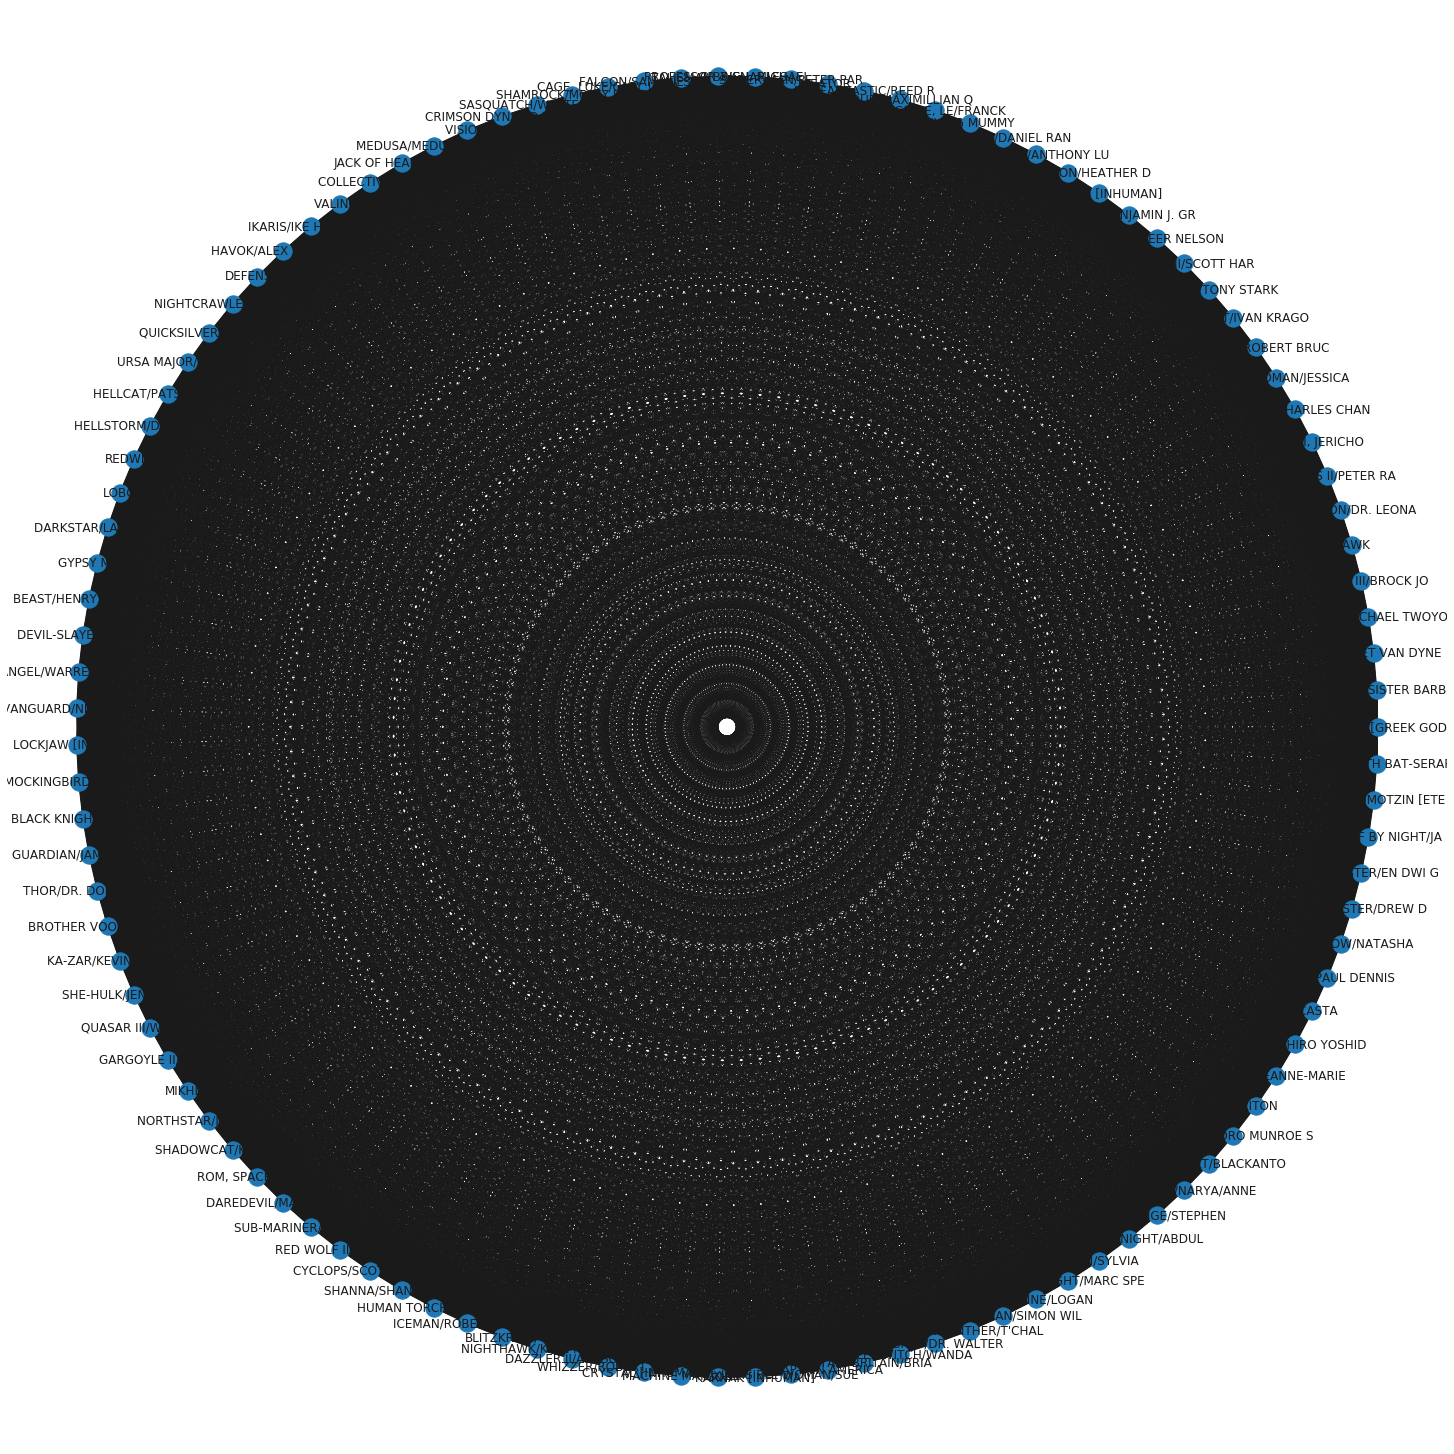

In [0]:
plt.figure(figsize=(20,20))
h = g.subgraph(h.vs["name"])
nx.draw_circular(h, with_labels=True)

## Example 2:  Lord of The Rings - Working with Cytoscape

In the next example, we will use networks created from the subtitles of the Lord of The Rings movie trilogy.
Let's start by loading each movie network from our [sub2network project](https://github.com/data4goodlab/subs2network), and joining them into a single network:

In [0]:
# Creating a dataset directory
!mkdir ./datasets/LTOR-networks
!wget https://www.dropbox.com/s/qk36gdgh1lmrdea/LTOR-networks.zip -O ./datasets/LTOR-networks/LTOR-networks.zip
!unzip ./datasets/LTOR-networks/*.zip  -d ./datasets/LTOR-networks/
!ls ./datasets/LTOR-networks/


--2020-03-10 09:37:55--  https://www.dropbox.com/s/qk36gdgh1lmrdea/LTOR-networks.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qk36gdgh1lmrdea/LTOR-networks.zip [following]
--2020-03-10 09:37:55--  https://www.dropbox.com/s/raw/qk36gdgh1lmrdea/LTOR-networks.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8592b268a8923d0d1563e9fdb4.dl.dropboxusercontent.com/cd/0/inline/AzqgeqeXJ03AofLYm6cZahon5YVa6ZdtnISVyS7xRMwi7zuiOMxuB7Ml_42Z7VcDTr3UzL-YxMOdsD77SyjgYA7xqzAMn6vMfqRbaksQPimOU9ZCtKUuP0ScH_AFAPc3-1Y/file# [following]
--2020-03-10 09:37:56--  https://uc8592b268a8923d0d1563e9fdb4.dl.dropboxusercontent.com/cd/0/inline/AzqgeqeXJ03AofLYm6cZahon5YVa6ZdtnISVyS7xRMwi7zuiOMxuB7Ml_42Z7VcDTr3UzL-YxMOdsD77SyjgYA7xqzAMn6vMfqR

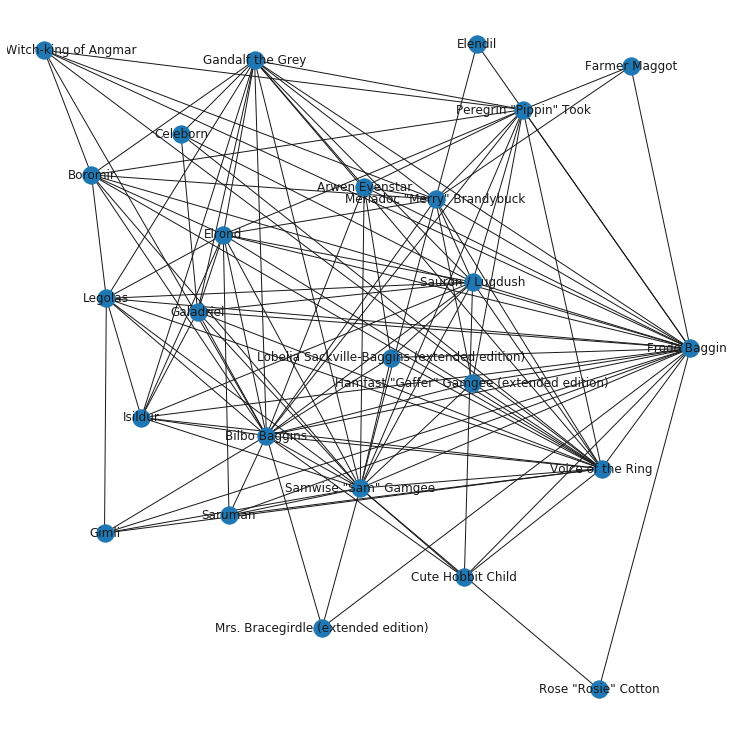

In [0]:
import networkx as nx
from networkx.readwrite import json_graph
import json
import turicreate as tc 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

j = json.load(open("./datasets/LTOR-networks/(2001) - The Lord of the Rings: The Fellowship of the Ring.json"))
g1 = json_graph.node_link_graph(j)
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(g1, with_labels=True)

In these networks, each edge has attributes, such as weight:

In [0]:
g1['Samwise "Sam" Gamgee']

AtlasView({'Frodo Baggins': {'first': 12, 'last': 3471, 'weight': 234}, 'Peregrin "Pippin" Took': {'first': 28, 'last': 3421, 'weight': 41}, 'Voice of the Ring': {'first': 34, 'last': 3441, 'weight': 53}, 'Lobelia Sackville-Baggins (extended edition)': {'first': 82, 'last': 1227, 'weight': 3}, 'Sauron / Lugdush': {'first': 89, 'last': 3007, 'weight': 13}, 'Meriadoc "Merry" Brandybuck': {'first': 182, 'last': 3421, 'weight': 30}, 'Legolas': {'first': 225, 'last': 2989, 'weight': 10}, 'Isildur': {'first': 227, 'last': 2173, 'weight': 4}, 'Bilbo Baggins': {'first': 374, 'last': 2812, 'weight': 55}, 'Hamfast "Gaffer" Gamgee (extended edition)': {'first': 374, 'last': 2173, 'weight': 3}, 'Elrond': {'first': 374, 'last': 2789, 'weight': 16}, 'Boromir': {'first': 728, 'last': 3303, 'weight': 16}, 'Gandalf the Grey': {'first': 873, 'last': 3333, 'weight': 25}, 'Mrs. Bracegirdle (extended edition)': {'first': 1101, 'last': 1101, 'weight': 3}, 'Arwen Evenstar': {'first': 1153, 'last': 3096, 'wei

In [0]:
g1['Samwise "Sam" Gamgee']['Frodo Baggins']

{'first': 12, 'last': 3471, 'weight': 234}

In [0]:
g1['Frodo Baggins']['Samwise "Sam" Gamgee']

{'first': 12, 'last': 3471, 'weight': 234}

Let's load the two other networks and join all the networks into a single large network:

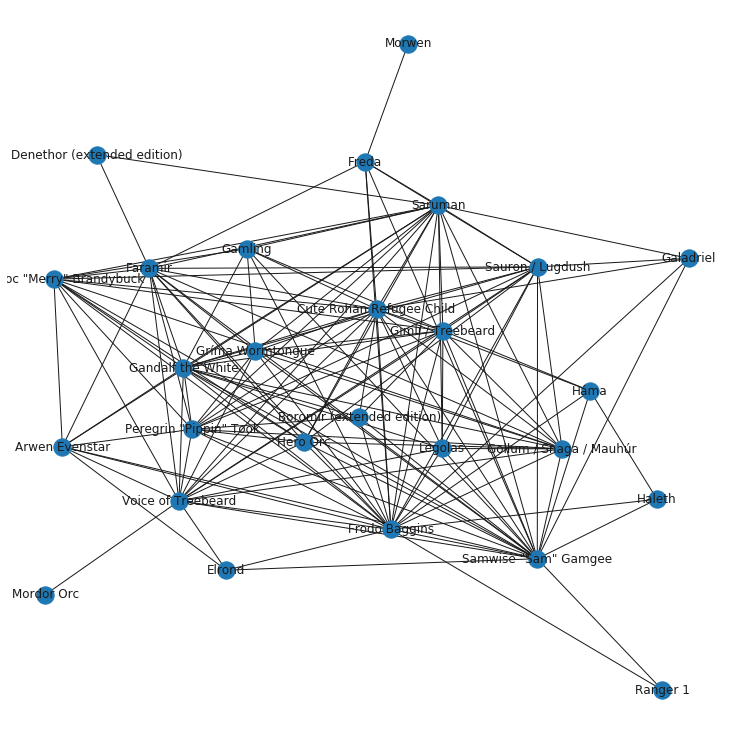

In [0]:
j = json.load(open("./datasets/LTOR-networks/(2002) - The Lord of the Rings: The Two Towers.json"))
g2 = json_graph.node_link_graph(j)
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(g2, with_labels=True)

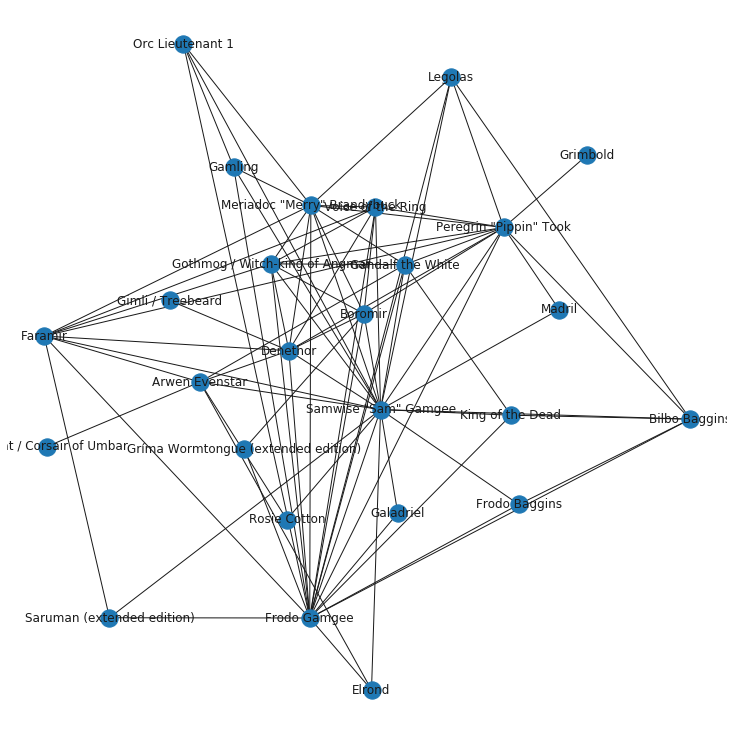

In [0]:
j = json.load(open("./datasets/LTOR-networks/(2003) - The Lord of the Rings: The Return of the King.json"))
g3 = json_graph.node_link_graph(j)
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(g3, with_labels=True)

Let's create the new large network:

In [0]:
lotr_graph = nx.Graph()
l = [g1,g2,g3]
nodes = set()
edges = set()
for g in l:
    nodes |= g.nodes()
    edges |= g.edges()

lotr_graph.add_nodes_from(nodes)
lotr_graph.add_edges_from(edges)

#let's add weights
for e in lotr_graph.edges():
    lotr_graph[e[0]][e[1]]['weight'] = 0

for g in l:
    for e in g.edges():
        lotr_graph[e[0]][e[1]]['weight'] += g[e[0]][e[1]]['weight']
        
print(nx.info(lotr_graph))
    

Name: 
Type: Graph
Number of nodes: 53
Number of edges: 295
Average degree:  11.1321


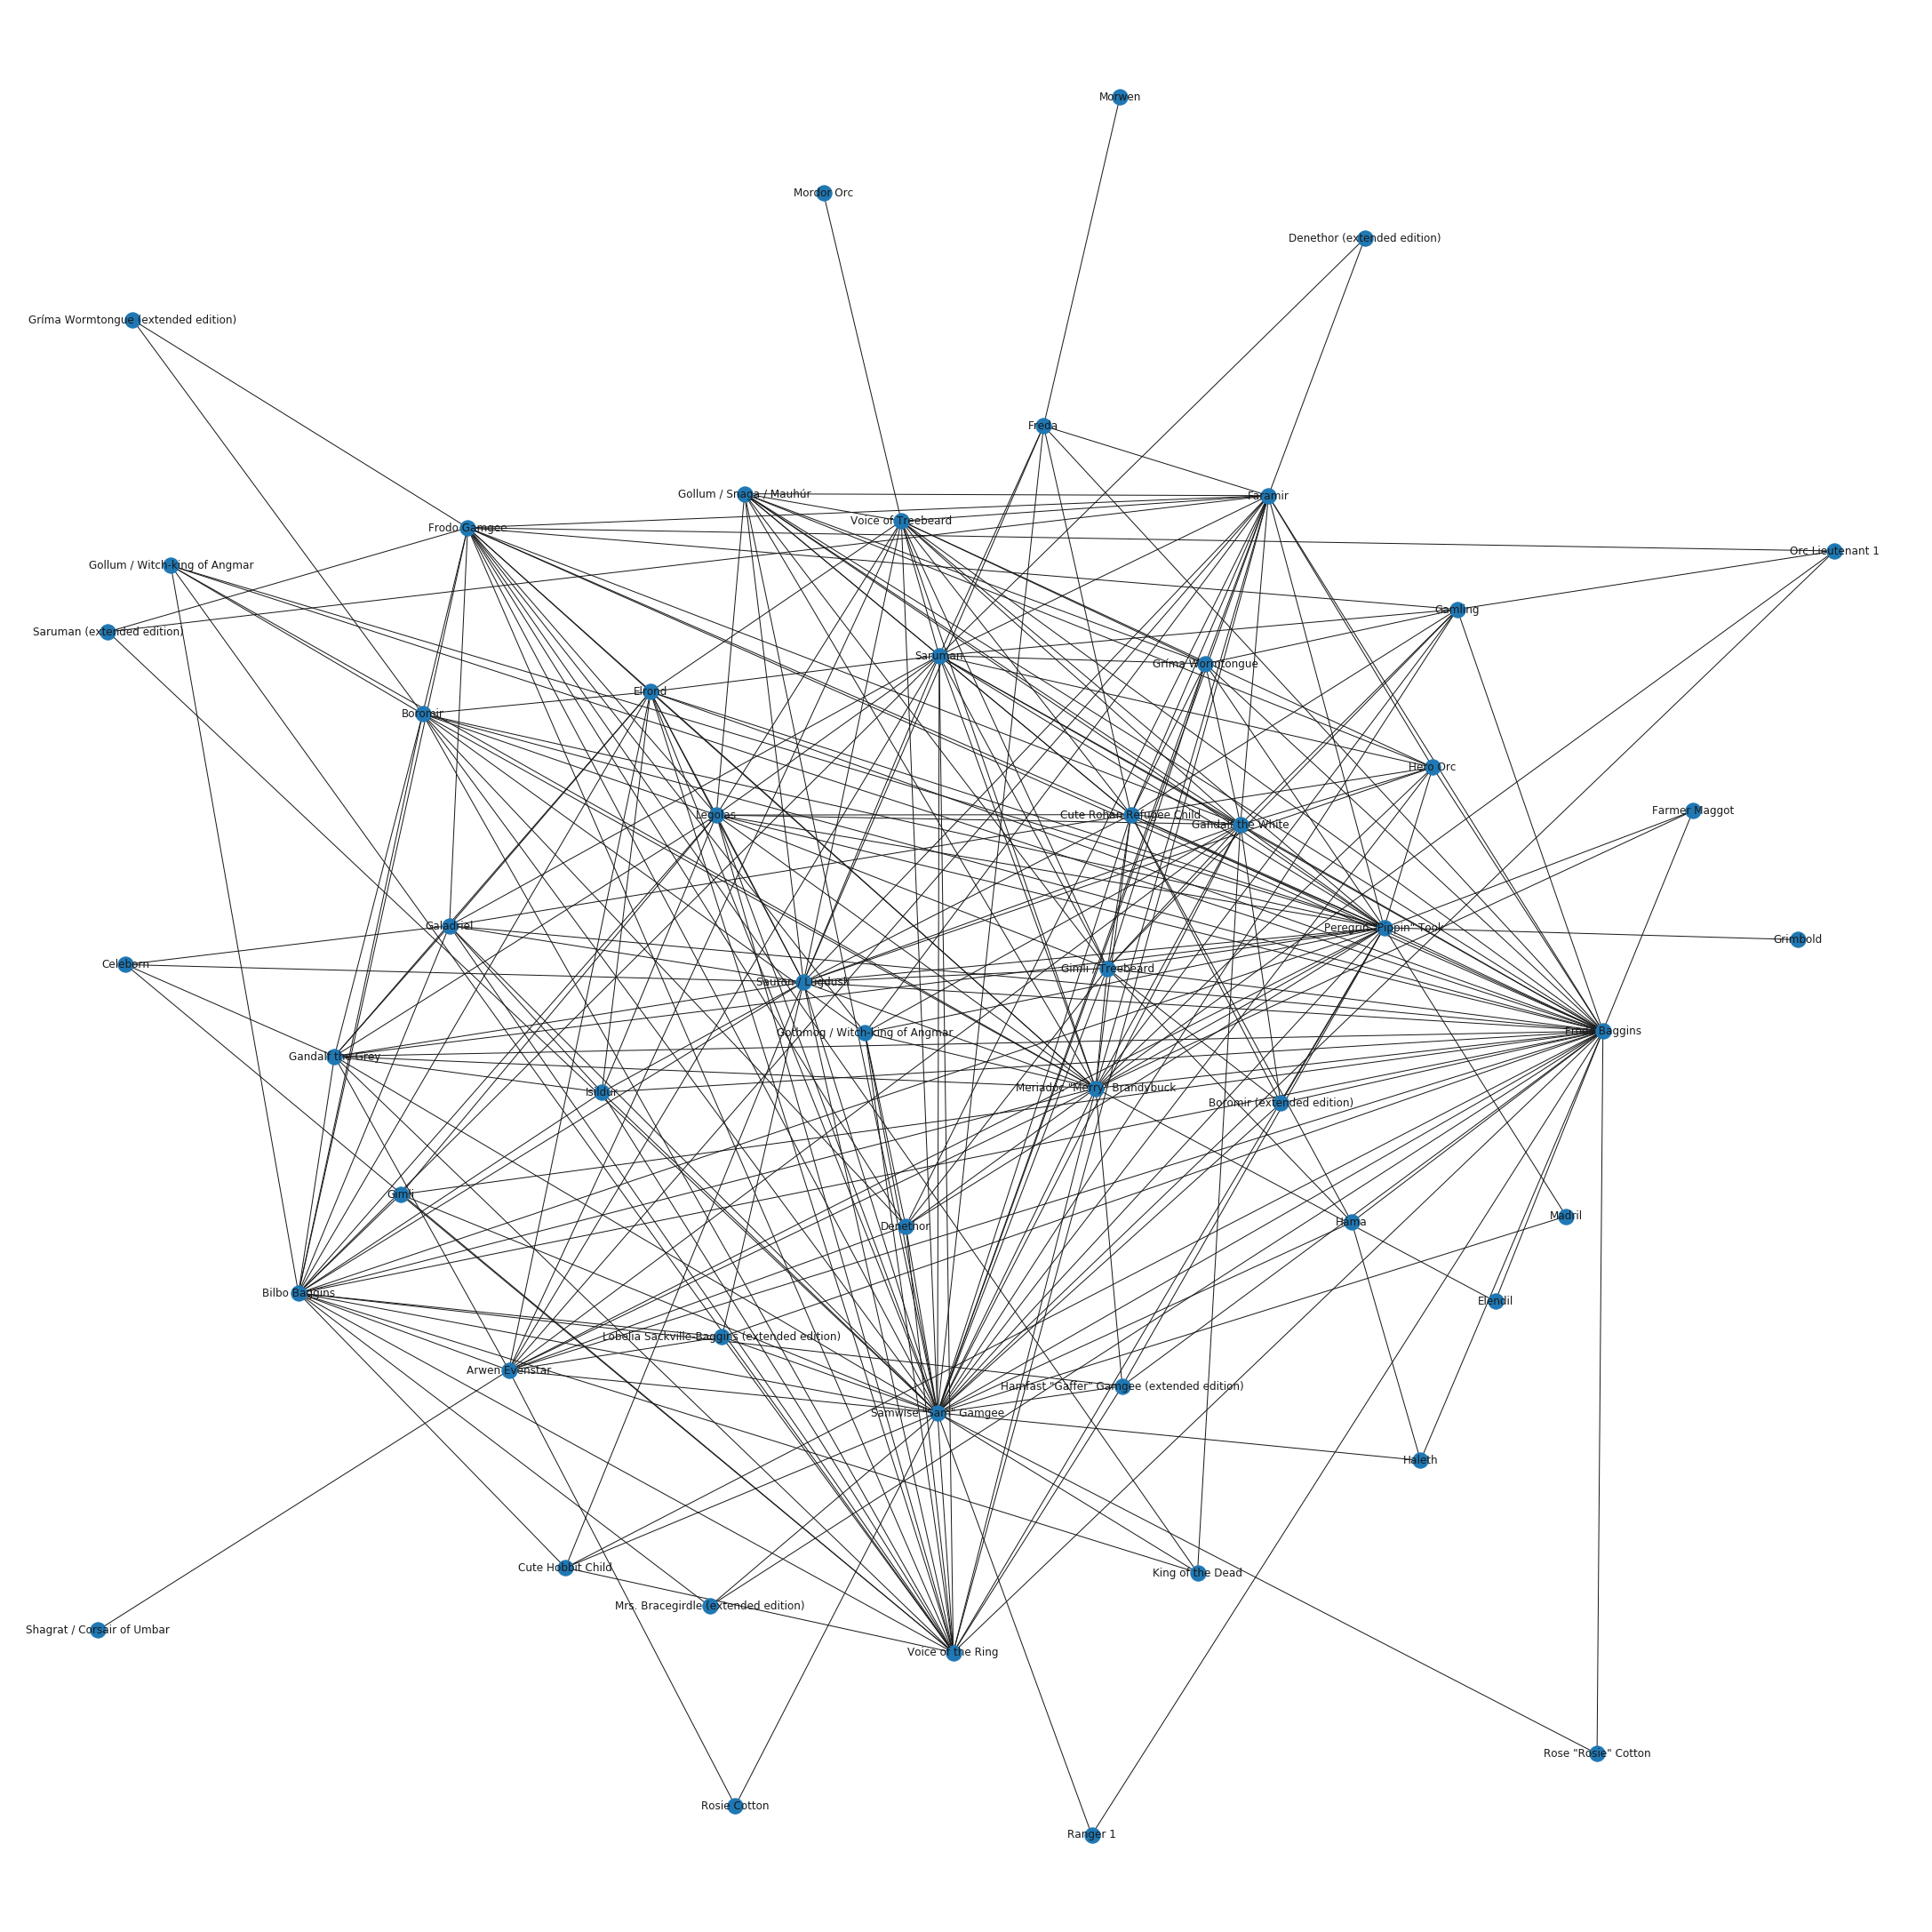

In [0]:
plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(lotr_graph, with_labels=True)


Let's clean the network data by removing nodes from the "extended edition":

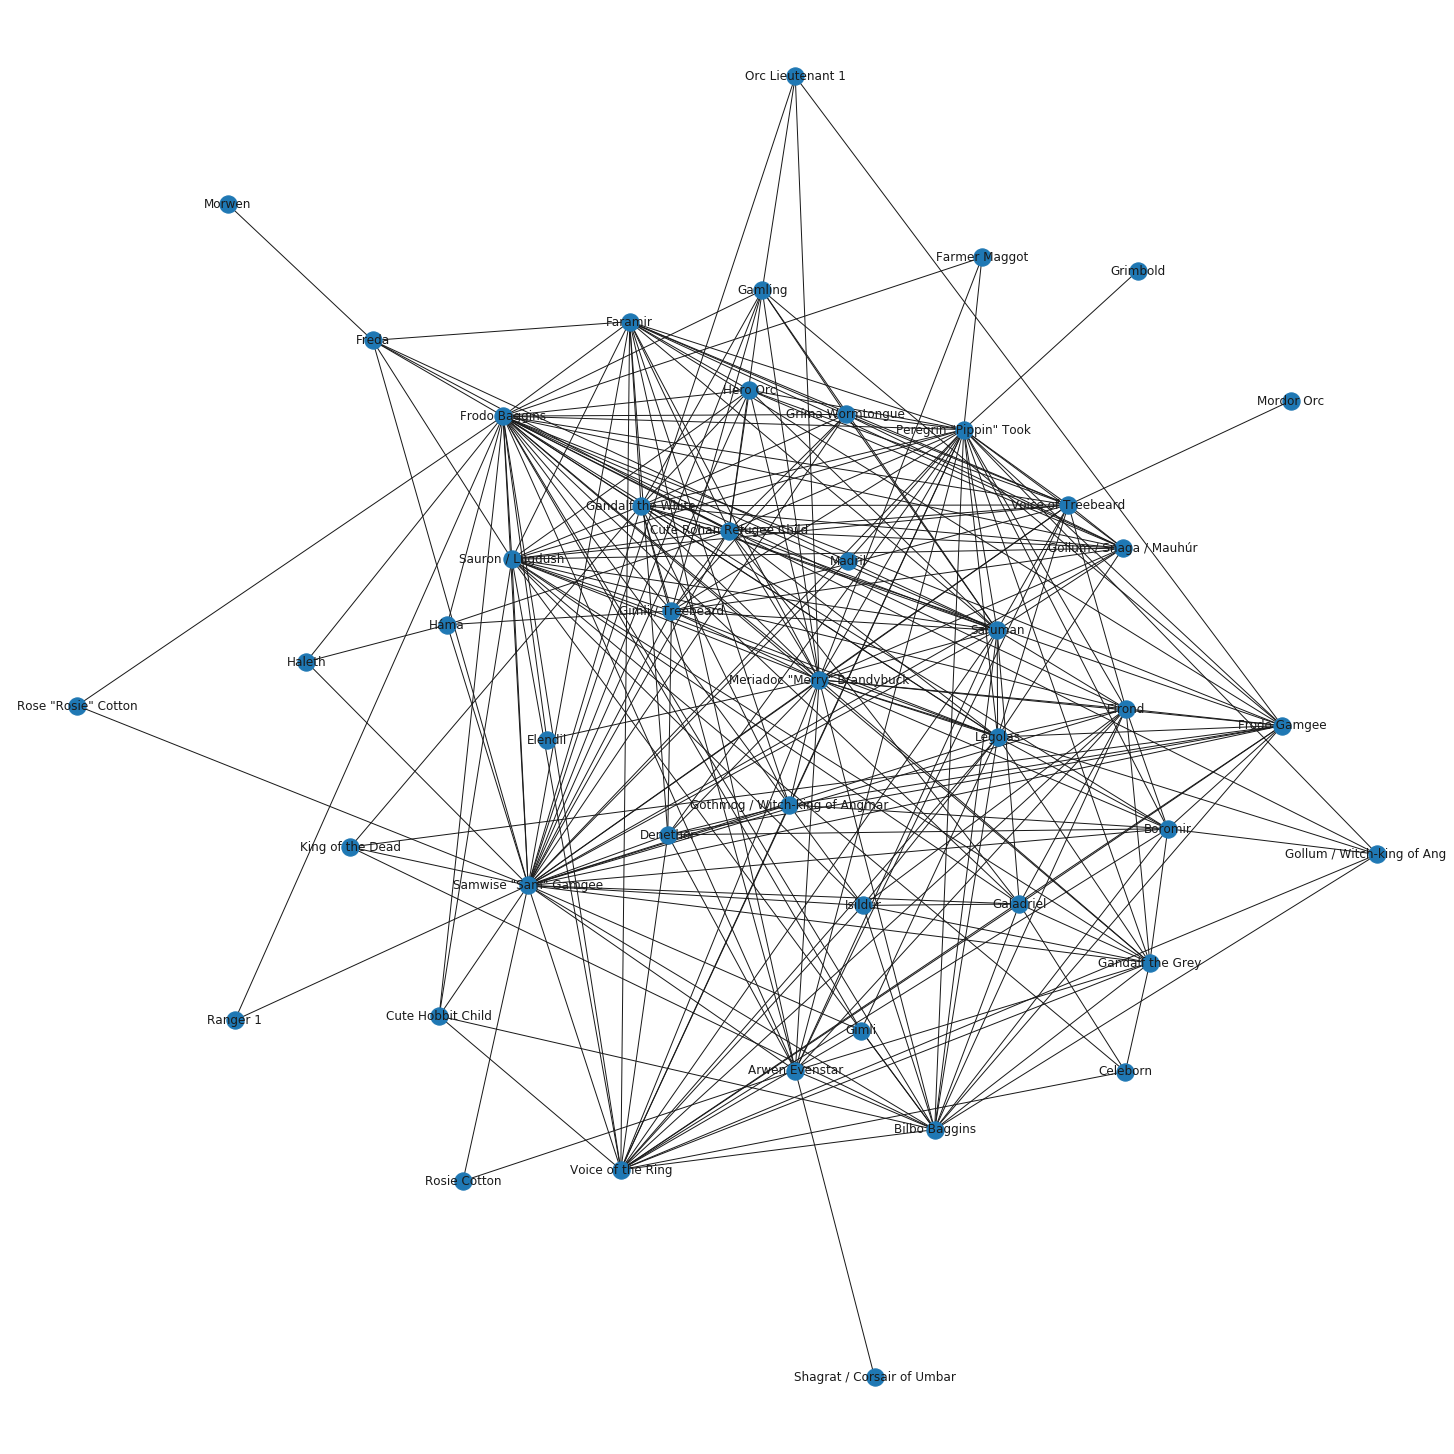

In [0]:
remove_list = [n for n in lotr_graph.nodes() if "(extended edition)" in n]
lotr_graph.remove_nodes_from(remove_list)
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(lotr_graph, with_labels=True)

In [0]:
from networkx.algorithms.community.label_propagation import label_propagation_communities
cc = list(label_propagation_communities(lotr_graph))
cc

[{'Arwen Evenstar',
  'Bilbo Baggins',
  'Boromir',
  'Celeborn',
  'Cute Hobbit Child',
  'Cute Rohan Refugee Child',
  'Denethor',
  'Elendil',
  'Elrond',
  'Faramir',
  'Farmer Maggot',
  'Freda',
  'Frodo Baggins',
  'Frodo Gamgee',
  'Galadriel',
  'Gamling',
  'Gandalf the Grey',
  'Gandalf the White',
  'Gimli',
  'Gimli / Treebeard',
  'Gollum / Snaga / Mauhúr',
  'Gollum / Witch-king of Angmar',
  'Gothmog / Witch-king of Angmar',
  'Grimbold',
  'Gríma Wormtongue',
  'Haleth',
  'Hero Orc',
  'Háma',
  'Isildur',
  'King of the Dead',
  'Legolas',
  'Madril',
  'Meriadoc "Merry" Brandybuck',
  'Mordor Orc',
  'Morwen',
  'Orc Lieutenant 1',
  'Peregrin "Pippin" Took',
  'Ranger 1',
  'Rose "Rosie" Cotton',
  'Rosie Cotton',
  'Samwise "Sam" Gamgee',
  'Saruman',
  'Sauron / Lugdush',
  'Shagrat / Corsair of Umbar',
  'Voice of Treebeard',
  'Voice of the Ring'}]

Let's save the network to a file and load it using Cytoscape and Gephi.

In [0]:
nx.write_gexf(lotr_graph, "./datasets/LTOR-networks/lotr_network_full.gexf")
nx.write_gml(lotr_graph, "./datasets/LTOR-networks/lotr_network_full.gml")

## Example 3:  Bitcoin Transactions - Working with Massive Networks and SGraph

For this example, we will use [The Bitcoin Transactions Network](http://dynamics.cs.washington.edu/data.html). Let's load the directed network into an SGraph object:


**Note:** An SGraph can only be used as a directed graph. To represent an undirected graph using SGraph, we can use double links, i.e., a undirected link (u,v) can be represented by two directed links (u,v) and (v,u)

In [0]:
!mkdir ./datasets/
!mkdir ./datasets/bitcoin
!wget http://dynamics.cs.washington.edu/nobackup/bitcoin/bitcoin.tar.gz -O ./datasets/bitcoin/bitcoin.tar.gz
!tar -xf ./datasets/bitcoin/bitcoin.tar.gz -C ./datasets/bitcoin/
!ls ./datasets/bitcoin/



--2020-03-11 05:52:49--  http://dynamics.cs.washington.edu/nobackup/bitcoin/bitcoin.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 678858686 (647M) [application/x-gzip]
Saving to: ‘./datasets/bitcoin/bitcoin.tar.gz’

./datasets/bitcoin/ 100%[===================>] 647.41M  5.06MB/s    in 40s     

2020-03-11 05:53:29 (16.2 MB/s) - ‘./datasets/bitcoin/bitcoin.tar.gz’ saved [678858686/678858686]

bitcoin  bitcoin.tar.gz
mkdir: cannot create directory ‘./datasets/’: File exists
mkdir: cannot create directory ‘./datasets/bitcoin’: File exists
--2020-03-11 05:53:52--  http://dynamics.cs.washington.edu/nobackup/bitcoin/bitcoin.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.e

In [0]:
import turicreate as tc 
import networkx as nx
import igraph
import matplotlib.pyplot as plt
%matplotlib inline

v_sf = tc.load_sframe("./datasets/bitcoin/bitcoin/bitcoin.vertices.sframe")
v_sf

Columns:
	vid	str
	first_transaction_date	datetime

Rows: 6336769

Data:
+---------+------------------------+
|   vid   | first_transaction_date |
+---------+------------------------+
| 4395186 |  2012-10-20 15:48:14   |
| 1579034 |  2011-11-22 20:54:59   |
| 4243589 |  2012-11-09 10:25:30   |
| 4410153 |  2012-10-22 22:11:36   |
|  801488 |  2011-09-09 09:15:17   |
|  168163 |  2013-03-02 13:44:11   |
| 6172882 |  2011-06-15 08:49:34   |
| 3625555 |  2012-12-30 19:26:02   |
| 3445329 |  2012-02-16 10:58:59   |
| 3066678 |  2011-06-11 08:29:10   |
+---------+------------------------+
[6336769 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [0]:
l_sf = tc.load_sframe("./datasets/bitcoin/bitcoin/bitcoin.links.sframe")
l_sf

Columns:
	dst_id	str
	src_id	str
	count	int
	maxdate	datetime
	mindate	datetime

Rows: 16057711

Data:
+---------+---------+-------+---------------------+---------------------+
|  dst_id |  src_id | count |       maxdate       |       mindate       |
+---------+---------+-------+---------------------+---------------------+
|   323   | 3078975 |   1   | 2013-01-24 08:13:47 | 2013-01-24 08:13:47 |
|  402879 | 5973967 |   1   | 2012-06-25 18:36:26 | 2012-06-25 18:36:26 |
|  486496 | 1249276 |   1   | 2012-02-09 08:08:30 | 2012-02-09 08:08:30 |
| 3329289 | 2304250 |   1   | 2011-08-10 20:08:32 | 2011-08-10 20:08:32 |
| 2147733 |  487172 |   1   | 2012-07-23 22:18:52 | 2012-07-23 22:18:52 |
| 5954510 | 5954808 |   1   | 2012-06-27 05:37:25 | 2012-06-27 05:37:25 |
| 4353234 | 4353424 |   1   | 2012-10-28 23:37:10 | 2012-10-28 23:37:10 |
|   447   |   2332  |   1   | 2013-01-22 19:17:41 | 2013-01-22 19:17:41 |
| 2516599 | 3037958 |   1   | 2011-07-14 15:51:02 | 2011-07-14 15:51:02 |
|  39648  |  122633 |   1   | 2012-01-10 00:06:20 | 2012-01-10 00:06:20 |
+---------+---------+-------+---------------------+---------------------+
[16057711 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [0]:
sg = tc.SGraph(vertices=v_sf, edges=l_sf, vid_field="vid", src_field="src_id", dst_field="dst_id")
sg.summary()

{'num_edges': 16057711, 'num_vertices': 6336769}

Using SGraph, we can run the following algorithms:
connected components, degree counting, graph coloring, k-Core, Label Propagation, PageRank, shortest path, and triangle counting.

Let's start by calculating vertices' degrees and PageRank:

In [0]:
pr = tc.pagerank.create(sg)
pr

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 5.33827e+06           |

| 2         | 3.0098e+06            |

| 3         | 1.54351e+06           |

| 4         | 792221                |

| 5         | 417110                |

| 6         | 230270                |

| 7         | 131478                |

| 8         | 82150.5               |

| 9         | 54595.9               |

| 10        | 38726.6               |

| 11        | 28653.3               |

| 12        | 21851                 |

| 13        | 17005.7               |

| 14        | 13388.9               |

| 15        | 10592.8               |

| 16        | 8462.61               |

| 17        | 6744.44               |

| 18        | 5429.65               |

| 19        | 4379.48               |

| 20        | 3541.97               |

+-----------+-----------------------+

Class                                    : PagerankModel

Graph
-----
num_edges                                : 16057711
num_vertices                             : 6336769

Results
-------
graph                                    : SGraph. See m['graph']
vertex pagerank                          : SFrame. See m.pagerank
change in last iteration (L1 norm)       : 3541.9687

Settings
--------
probability of random jumps to any node in the graph : 0.15
convergence threshold (L1 norm)          : 0.01
maximum number of iterations             : 20

Metrics
-------
training time (secs)                     : 20.6814
number of iterations                     : 20

Queryable Fields
----------------
delta                                    : Change in pagerank for the last iteration in L1 norm
graph                                    : A new SGraph with the pagerank as a vertex property
max_iterations                           : The maximun number of iterations to run
num_iterations               

In [0]:
pr['pagerank']

Columns:
	__id	str
	pagerank	float
	delta	float

Rows: 6336769

Data:
+---------+--------------------+------------------------+
|   __id  |      pagerank      |         delta          |
+---------+--------------------+------------------------+
| 5947163 | 0.8514181872876614 | 0.0013531001166043888  |
| 5854553 | 0.2608694996608124 | 7.2848881926823594e-09 |
|  232635 | 3.1242673620351034 |  0.002538871337408821  |
| 3746728 | 0.6984921504520591 | 0.0006543138037893304  |
| 2481512 | 0.2608194103929159 |          0.0           |
|  997042 | 0.260869592538586  | 3.6963969329839585e-08 |
| 4484990 | 0.8683351150962303 | 0.00011757128176148601 |
| 4680065 | 0.150563269707679  |          0.0           |
| 3235776 | 1.3720298762494691 |  0.001773661955866146  |
| 4764442 | 0.260869592538586  | 3.6963969329839585e-08 |
+---------+--------------------+------------------------+
[6336769 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [0]:
sg.vertices['pagerank'] = pr['graph'].vertices['pagerank'] #pr['graph'] is a graph in which each vertex has pagerank value
sg.vertices

Columns:
	__id	str
	first_transaction_date	datetime
	pagerank	float

Rows: 6336769

Data:
+---------+------------------------+--------------------+
|   __id  | first_transaction_date |      pagerank      |
+---------+------------------------+--------------------+
| 5947163 |  2011-04-15 02:39:49   | 0.8514181872876614 |
| 5854553 |  2011-02-28 02:41:54   | 0.2608694996608124 |
|  232635 |  2013-01-26 18:48:34   | 3.1242673620351034 |
| 3746728 |  2012-12-22 00:32:48   | 0.6984921504520591 |
| 2481512 |  2011-07-26 11:37:08   | 0.2608194103929159 |
|  997042 |  2013-04-07 20:57:12   | 0.260869592538586  |
| 4484990 |  2012-10-16 14:30:58   | 0.8683351150962303 |
| 4680065 |  2012-10-01 17:44:15   | 0.150563269707679  |
| 3235776 |  2013-01-16 23:10:24   | 1.3720298762494691 |
| 4764442 |  2011-07-14 04:05:36   | 0.260869592538586  |
+---------+------------------------+--------------------+
[6336769 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [0]:
degree = tc.degree_counting.create(sg)
degree['graph']

SGraph({'num_edges': 16057711, 'num_vertices': 6336769})
Vertex Fields:['__id', 'in_degree', 'out_degree', 'total_degree']
Edge Fields:['__src_id', '__dst_id']

In [0]:
# Addding in,out, and total degree to the vertices attributes
sg.vertices['total_degree'] = degree['graph'].vertices['total_degree']
sg.vertices['in_degree'] = degree['graph'].vertices['in_degree']
sg.vertices['out_degree'] = degree['graph'].vertices['out_degree']
sg.vertices.sort("total_degree", ascending=False)

Columns:
	__id	str
	first_transaction_date	datetime
	pagerank	float
	total_degree	int
	in_degree	int
	out_degree	int

Rows: 6336769

Data:
+---------+------------------------+---------------------+--------------+-----------+
|   __id  | first_transaction_date |       pagerank      | total_degree | in_degree |
+---------+------------------------+---------------------+--------------+-----------+
|    25   |  2012-04-18 10:46:16   |  100423.31634155811 |    610712    |   315492  |
|    11   |  2010-11-07 20:29:49   |  103649.18860840397 |    610017    |   364118  |
|    29   |  2012-06-17 20:02:15   |  90021.86345817512  |    300405    |   256900  |
|    74   |  2011-05-03 18:14:27   |  39379.68773959632  |    225866    |   194385  |
|    27   |  2011-08-08 09:40:32   |  24831.655129941762 |    130918    |   105986  |
|  12564  |  2011-06-18 02:57:46   |  35912.816990587075 |    130377    |   101990  |
|  12061  |  2012-10-11 19:05:25   |   13489.0411122985  |    121967    |   121716  |
|  870051 |  2011-07-05 13:23:23   |  0.8946729305093974 |    119082    |     3     |
| 1877737 |  2011-07-05 16:31:41   | 0.15000638628449428 |    118909    |     1     |
|   5104  |  2010-04-26 21:30:05   |  10317.817475328378 |    61308     |   52564   |
+---------+------------------------+---------------------+--------------+-----------+
+------------+
| out_degree |
+------------+
|   295220   |
|   245899   |
|   43505    |
|   31481    |
|   24932    |
|   28387    |
|    251     |
|   119079   |
|   118908   |
|    8744    |
+------------+
[6336769 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

As can be seen, there are some accounts that have extremely high degrees (of over 100,000). Let's compare SGraph performances to those of Networkx and iGraph:

In [0]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


ng = sgraph2nxgraph(sg)
print("Networkx: %s" % nx.info(ng))


Networkx: Name: 
Type: DiGraph
Number of nodes: 6336769
Number of edges: 16057711
Average in degree:   2.5341
Average out degree:   2.5341


In [0]:
import igraph
def sgraph2igraph(sgraph, is_directed=True):
    g = igraph.Graph(directed=is_directed)
    vertices = list(sgraph.vertices['__id'])
    g.add_vertices(len(vertices))
    g.vs["name"] = vertices
    v_dict = {vertices[i]: i for i in range(len(vertices))}
    edges = [(v_dict[e['__src_id']], v_dict[e['__dst_id']]) for e in  sgraph.edges]
    g.add_edges([e[0], e[1]] for e in edges)
    
    return g
  
ig = sgraph2igraph(sg)
print("iGraph: Vertices %s and Links %s" % (ig.vcount(), ig.ecount()))

iGraph: Vertices 6336769 and Links 16057711


In [0]:
# the may be difference in the input parameters 
%timeit ig.pagerank(niter=1000)
%timeit tc.pagerank.create(sg,verbose=False, max_iterations=1000)

1 loop, best of 3: 17.5 s per loop
1 loop, best of 3: 1min 21s per loop


In [0]:
# %timeit nx.pagerank(ng) # will take very long time

The Bitcoin Transaction network is too large to be visualized. Let's split the network into weakly connected components:

In [0]:
wcc =  sorted(nx.weakly_connected_components(ng),key=len, reverse=True)
[len(c) for c in wcc][:20]

[6296406, 51, 28, 25, 19, 15, 14, 13, 13, 10, 9, 8, 8, 7, 7, 7, 7, 6, 6, 6]

As can see from the above, we have one large weakly connected component and many components with only one vertex.
Let's draw the second large component with 51 vertices:


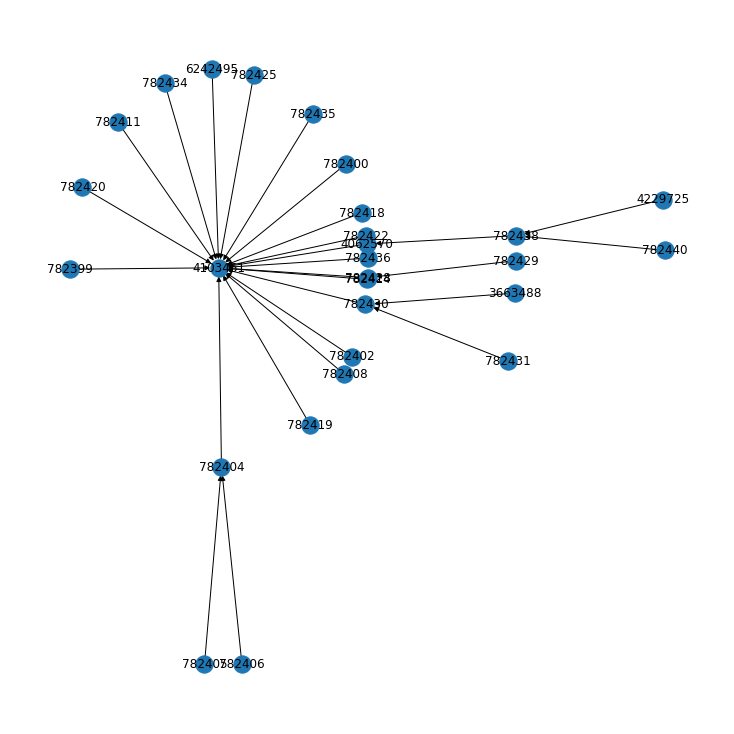

In [0]:
h = ng.subgraph(wcc[2])
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(h, with_labels=True)

Let's try to find the [strongly connected components](https://en.wikipedia.org/wiki/Strongly_connected_component):

In [0]:
scc = sorted(nx.strongly_connected_components(ng), key=len, reverse=True)
[len(c) for c in scc][:20]

[4611197,
 3205,
 2029,
 1328,
 1286,
 1240,
 845,
 633,
 321,
 126,
 97,
 91,
 71,
 45,
 41,
 41,
 37,
 32,
 31,
 28]

Let's draw the component with 321 vertices:

In [0]:
h = ng.subgraph(scc[8])
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(h)

Another way to visualize large networks is using the [K-Core decomposition algorithm](https://arxiv.org/pdf/cs/0504107.pdf).
Let's use it to visualize the vertices with the degree of above 1000:

In [0]:
#we can also use tc.kcore.create(sg). However, this need computational power and more time
v_list = sg.vertices[sg.vertices['total_degree'] > 200]['__id'] 
len(v_list)

In [0]:
h = ng.subgraph(v_list)
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(h)

## Further Readings and Practice

* [ Michael Fire: The Science of networks: Big Data in action](https://youtu.be/6z8FUud0GII)
* [Network Science Course](https://chatox.github.io/networks-science-course/) by Carlos Castillo
* [Top 30 Social Network Analysis and Visualization Tools](https://www.kdnuggets.com/2015/06/top-30-social-network-analysis-visualization-tools.html) by Devendra Desale
* [Lecture 24 — Community Detection in Graphs - Motivation](https://www.youtube.com/watch?v=k0uxnVEuuz0) | Stanford University
* [k-Core Decomposition: A tool for the visualization of Large Scale Networks](https://arxiv.org/pdf/cs/0504107.pdf) by Alvarez-Hamelin, José Ignacio, et al. 





  